# Project: Income (per person) Data Analysis
### by Suelen Fenali

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
    <ul>
    <li><a href="#requirements">Requirements</a></li>
    </ul>
<li><a href="#wrangling">Data Wrangling</a></li>
    <ul>
    <li><a href="#structure">Data Structure</a></li>
    <li><a href="#inspection">Data Inspection</a></li>
    <li><a href="#cleaning">Data Cleaning</a></li>
    </ul>
<li><a href="#visuals">Visual Utils Functions</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
    <ul>
    <li><a href="#question_1">Does the mean years spent by the population of a country  in school is related to its income?</a></li>
    <li><a href="#question_2">How the percentage of workers per employment sector is related to the income in a country?</a></li>
    <li><a href="#question_3">How the percentage of workers per employment status is related to the income in a country?</a></li>
    <li><a href="#question_4">Is there a correlation between the mean years in school and the employment sector proportions?</a></li>
    <li><a href="#question_5">Is there a correlation between the mean years in school and the employment status proportions?</a></li>
    <li><a href="#question_6">Is there a correlation between the employment sector and the employment status?</a></li>
    </ul>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


The income per person of a country is a measure of how much money is earned by an individual. This is used as an indicator of the living conditions and quality of life in that country ([Investopedia](https://www.investopedia.com/terms/i/income-per-capita.asp)).
Many different variables can be related to the income amount of an area. The data selected to this analysis is provided by [Gapminder World](https://www.gapminder.org/data/), and it is composed by four main indicators.
1. **Mean years at school**
   * The average number of years of school attended by men and women 25 years and older. 
   
   *Assumption: This analysis considers that men and women older than 25 years old represent the biggest portion of the work force of a country.*
   

2. **Employment by sector**
   * This indicator is composed of three sectors, which are: Agriculture, Industry and Service. For every sector there's the percentage of all employees that work in that sector for each country.


3. **Employment by status**
   * The status includes three categories, which are: Family workers, Salaried workers and Self-employed workers. For every status there's the percentage of all employees that work that way for each country.
   
   
4. **Income**
   * Income per person, which is calculated by: $\frac{Gross Domestic Product}{Country Population}$
   
The data is available in csv format. The `employment by sector` and `employment by status` indicators are provided in files separated by the categories. Also, the `mean years in school` is divided considering male and female data.

This analysis intends to look for correlations among the indicators and the income per person in a country. In order to achieve this goal, there are some questions that will guide this study:
1. *Does the mean years spent by the population of a country  in school is related to its income?*
2. *How the percentage of workers per employment sector is related to the income in a country?*
3. *How the percentage of workers per employment status is related to the income in a country?*
4. *Is there a correlation between the mean years in school and the employment sector proportions?*
5. *Is there a correlation between the mean years in school and the employment status proportions?*
6. *Is there a correlation between the employment sector and the employment status?*

<a id='requirements'></a>
### Requirements

**python 3.7.3**

* matplotlib==3.0.3
* numpy==1.16.3
* pandas==0.24.2
* seaborn==0.9.0

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from IPython.core.display import display, HTML 
def create_link(id): # This function makes possible to use HTML inside a code cell
    display(HTML('<a id={id}></a>'.format(id=id))) # (used to link the explanations to the charts)
    
sns.set()
sns.set_palette("RdBu", 6)

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

In this section I will check the data structure and perform the necessary clean procedures.

<a id='structure'></a>
### Data Structure

The data in Gapminder is provided separately by each indicator. I will start loading the data in many DataFrames.

In [2]:
income = pd.read_csv('data/income_per_person_gdppercapita_ppp_inflation_adjusted.csv')

men_mean_yrs_school = pd.read_csv('data/mean_years_in_school_men_25_years_and_older.csv')
women_mean_yrs_school = pd.read_csv('data/mean_years_in_school_women_25_years_and_older.csv')

agriculture = pd.read_csv('data/agriculture_workers_percent_of_employment.csv')
industry = pd.read_csv('data/industry_workers_percent_of_employment.csv')
service = pd.read_csv('data/service_workers_percent_of_employment.csv')

family = pd.read_csv('data/family_workers_percent_of_employment.csv')
self_employed = pd.read_csv('data/self_employed_percent_of_employment.csv')
salaried = pd.read_csv('data/salaried_workers_percent_of_non_agricultural_employment.csv')

The next step will be understanding how the data is structured.

In [3]:
income.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040
0,Afghanistan,603,603,603,603,603,603,603,603,603,...,2420,2470,2520,2580,2640,2700,2760,2820,2880,2940
1,Albania,667,667,667,667,667,668,668,668,668,...,18500,18900,19300,19700,20200,20600,21100,21500,22000,22500
2,Algeria,715,716,717,718,719,720,721,722,723,...,15600,15900,16300,16700,17000,17400,17800,18200,18600,19000
3,Andorra,1200,1200,1200,1200,1210,1210,1210,1210,1220,...,73200,74800,76400,78100,79900,81600,83400,85300,87200,89100
4,Angola,618,620,623,626,628,631,634,637,640,...,6270,6410,6550,6700,6850,7000,7150,7310,7470,7640


In [4]:
men_mean_yrs_school.head()

,country,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009
0,Afghanistan,0.7,0.7,0.8,0.8,0.8,0.9,0.9,0.9,1.0,...,2.1,2.1,2.2,2.3,2.3,2.4,2.4,2.5,2.6,2.6
1,Albania,5.1,5.2,5.3,5.5,5.6,5.7,5.9,6.0,6.1,...,9.1,9.2,9.4,9.5,9.6,9.8,9.9,10.0,10.1,10.2
2,Algeria,0.9,0.9,1.0,1.1,1.1,1.2,1.2,1.3,1.4,...,3.7,3.8,3.9,4.0,4.1,4.3,4.4,4.5,4.6,4.7
3,Angola,1.4,1.5,1.5,1.6,1.7,1.7,1.8,1.9,2.0,...,4.0,4.1,4.3,4.4,4.5,4.6,4.7,4.9,5.0,5.1
4,Antigua and Barbuda,7.0,7.1,7.2,7.4,7.5,7.6,7.8,7.9,8.1,...,11.0,11.1,11.2,11.3,11.4,11.5,11.5,11.6,11.7,11.8


### Changing the data shape

Every indicator is one different csv file, so there's a column to the country and one row for each value. For every year there's a column, and depending on the indicator there are different number of years.

To make the DataFrames more consistent and more appropriated to inspect the data it's better reshaping them. So, they will look like this:

| country    | year    | value  |
| -----------|:-------:| -----:|
| Brazil     | 1900 | 0.7 |
| Brazil     | 1901 | 0.8 |
| Canada     | 1900 | 0.75 |
| Germany | 1900    | 0.9 |

Firstly, I will change the income DataFrame to check how it looks.

In [5]:
income.shape

(193, 242)

Searching a bit on Google, I found the pandas function [melt](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.melt.html), which I can use to reshape the data.

In [6]:
income = income.melt(id_vars=['country'], var_name='year', value_name='income')

In [7]:
income.head()

,country,year,income
0,Afghanistan,1800,603
1,Albania,1800,667
2,Algeria,1800,715
3,Andorra,1800,1200
4,Angola,1800,618


In [8]:
income.shape

(46513, 3)

Since it worked, and it is the way I want the DataFrames to be, I will do the same change in the other DFs.

In [9]:
# Change the mean years in school data.
men_mean_yrs_school = men_mean_yrs_school.melt(id_vars=['country'], var_name='year', value_name='mean_years')
women_mean_yrs_school = women_mean_yrs_school.melt(id_vars=['country'], var_name='year', value_name='mean_years')

# Change the employment sector data.
agriculture = agriculture.melt(id_vars=['country'], var_name='year', value_name='agriculture_workers_perc')
industry = industry.melt(id_vars=['country'], var_name='year', value_name='industry_workers_perc')
service = service.melt(id_vars=['country'], var_name='year', value_name='service_workers_perc')

# Change the employment status data.
family = family.melt(id_vars=['country'], var_name='year', value_name='family_workers_perc')
salaried = salaried.melt(id_vars=['country'], var_name='year', value_name='salaried_workers_perc')
self_employed = self_employed.melt(id_vars=['country'], var_name='year', value_name='self_employed_workers_perc')

In [10]:
men_mean_yrs_school.head()

,country,year,mean_years
0,Afghanistan,1970,0.7
1,Albania,1970,5.1
2,Algeria,1970,0.9
3,Angola,1970,1.4
4,Antigua and Barbuda,1970,7.0


In [11]:
agriculture.head()

,country,year,agriculture_workers_perc
0,Afghanistan,1970,NaN
1,Albania,1970,NaN
2,Algeria,1970,NaN
3,Angola,1970,NaN
4,Antigua and Barbuda,1970,NaN


<a id='inspection'></a>
### Data Inspection

Now that all the DataFrames are in the same format, I will procede inspecting the data to search for empty rows, duplicated data, wrong data types and other possible incosistenses.

1. [Income](#ins_income)
2. [Mean years in school](#ins_mean)
3. [Employment by sector](#ins_sector)
4. [Employment by status](#ins_status)

<a id='ins_income'></a>
#### Income data

In [12]:
income.shape

(46513, 3)

In [13]:
income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46513 entries, 0 to 46512
Data columns (total 3 columns):
country    46513 non-null object
year       46513 non-null object
income     46513 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.1+ MB


In [14]:
income.isna().sum()

country    0
year       0
income     0
dtype: int64

In [15]:
sum(income.duplicated())

0

`shape` shows that the data for income has 46513 rows and 3 columns.

`info` shows that there's no Null values in any column. However, the column `year` has Object as type, but could be an Integer. Double checking Null values with `isna()` it's possible to see that everything is filled out.

`duplicated` shows that there's no duplicated data for income.

The only change I will have to perform in this DataFrame in the [cleaning](#cleaning) step is changing the `year` to the right type.

<a id='ins_mean'></a>
#### Mean years in school
For this indicator I have the data split by gender, so all the operations will be performed twice. Following, I will see the shape of data and search for missing values, duplicated rows and data types.

In [16]:
men_mean_yrs_school.shape

(6960, 3)

In [17]:
women_mean_yrs_school.shape

(6960, 3)

In [18]:
men_mean_yrs_school.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6960 entries, 0 to 6959
Data columns (total 3 columns):
country       6960 non-null object
year          6960 non-null object
mean_years    6960 non-null float64
dtypes: float64(1), object(2)
memory usage: 163.2+ KB


In [19]:
women_mean_yrs_school.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6960 entries, 0 to 6959
Data columns (total 3 columns):
country       6960 non-null object
year          6960 non-null object
mean_years    6960 non-null float64
dtypes: float64(1), object(2)
memory usage: 163.2+ KB


In [20]:
men_mean_yrs_school.isna().sum()

country       0
year          0
mean_years    0
dtype: int64

In [21]:
women_mean_yrs_school.isna().sum()

country       0
year          0
mean_years    0
dtype: int64

In [22]:
men_mean_yrs_school.duplicated().sum()

0

In [23]:
women_mean_yrs_school.duplicated().sum()

0

`shape` shows that both DataFrames `men_mean_years` and `women_men_years` have 6960 rows and 3 columns.

`info` shows that there's no Null values in any column. The column `year` has Object as type, but could be an Integer.

Checking Null values with `isna()` it's possible to see that everything is filled out.

`duplicated` shows that there's no duplicated data for men and women mean years in school.

Both DataFrames seem very similiar, which can make possible merging them. However, to make sure they have the same values I will check as follows:

In [24]:
men_mean_yrs_school.country.equals(women_mean_yrs_school.country)

True

In [25]:
men_mean_yrs_school.year.equals(women_mean_yrs_school.year)

True

The `mean years in school` for both genders is very consistent. The number of values for each column, and the values for country and years are the same, which shows that the data for men and women have values for the same period of time and region.

In order to make the analysis smooth, these two DataFrames could be merged into one. So, the changes I will perform in the [cleaning](#cleaning) step are merging the `men` and `women` data, and then changing the `year` to Integer type.

<a id='ins_sector'></a>
#### Employment by sector
For this indicator I have the data split by sector categories, so all the operations will be performed three times. Following I will see the shape of data and search for missing values, duplicated rows and data types.

In [26]:
agriculture.shape

(8448, 3)

In [27]:
industry.shape

(8448, 3)

In [28]:
service.shape

(8448, 3)

In [29]:
agriculture.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8448 entries, 0 to 8447
Data columns (total 3 columns):
country                     8448 non-null object
year                        8448 non-null object
agriculture_workers_perc    3470 non-null float64
dtypes: float64(1), object(2)
memory usage: 198.1+ KB


In [30]:
agriculture.isna().sum()

country                        0
year                           0
agriculture_workers_perc    4978
dtype: int64

In [31]:
industry.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8448 entries, 0 to 8447
Data columns (total 3 columns):
country                  8448 non-null object
year                     8448 non-null object
industry_workers_perc    3534 non-null float64
dtypes: float64(1), object(2)
memory usage: 198.1+ KB


In [32]:
industry.isna().sum()

country                     0
year                        0
industry_workers_perc    4914
dtype: int64

In [33]:
service.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8448 entries, 0 to 8447
Data columns (total 3 columns):
country                 8448 non-null object
year                    8448 non-null object
service_workers_perc    3534 non-null float64
dtypes: float64(1), object(2)
memory usage: 198.1+ KB


In [34]:
service.isna().sum()

country                    0
year                       0
service_workers_perc    4914
dtype: int64

In [35]:
agriculture.duplicated().sum()

0

In [36]:
industry.duplicated().sum()

0

In [37]:
service.duplicated().sum()

0

`shape` shows that the three categories `agriculture`, `industry` and `service` have 8448 rows and 3 columns.

`info` shows that the column `year` has Object as type, but could be an Integer. Also, it presents that there are some Null values in each column. Checking these Null values with `isna()` it's possible to see that...
* agriculture = 4978 Null values
* industry = 4914 Null values
* service = 4914 Null values

`duplicated` shows that there's no duplicated data for any employment sector.


---
<a id='explained_1'></a>
In order to make the data more accessible to the [exploratory analysis](#eda), these three DataFrames could be merged into one, since they are related to the same indicator, where each one is a category for the employment sector.
As shown above, the data for each category have some missing values, which can be different for countries and years among the three of them. So, the changes I will perform in the [cleaning](#cleaning) step are merging the `agriculture`, `industry` and `service` data, dropping the rows with Null values, and then changing the `year` to Integer type.


<a id='ins_status'></a>
#### Employment by status
This indicator has the data split by status categories, so all the operations will be performed three times, such as in `employment by sector`. As follows, I will see the shape of data and search for missing values, duplicated rows and data types.

In [38]:
family.shape

(8208, 3)

In [39]:
salaried.shape

(9940, 3)

In [40]:
self_employed.shape

(5728, 3)

Unlike the data so far, the `shape` for `employment status` shows that the three categories `family`, `salaried` and `self_employed` have different number of rows and columns.

In [41]:
family.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8208 entries, 0 to 8207
Data columns (total 3 columns):
country                8208 non-null object
year                   8208 non-null object
family_workers_perc    2473 non-null float64
dtypes: float64(1), object(2)
memory usage: 192.5+ KB


In [42]:
family.isna().sum()

country                   0
year                      0
family_workers_perc    5735
dtype: int64

In [43]:
salaried.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9940 entries, 0 to 9939
Data columns (total 3 columns):
country                  9940 non-null object
year                     9940 non-null object
salaried_workers_perc    1760 non-null float64
dtypes: float64(1), object(2)
memory usage: 233.0+ KB


In [44]:
salaried.isna().sum()

country                     0
year                        0
salaried_workers_perc    8180
dtype: int64

In [45]:
self_employed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 3 columns):
country                       5728 non-null object
year                          5728 non-null object
self_employed_workers_perc    5728 non-null float64
dtypes: float64(1), object(2)
memory usage: 134.3+ KB


In [46]:
self_employed.isna().sum()

country                       0
year                          0
self_employed_workers_perc    0
dtype: int64

`info` shows that the column `year` has Object as type, but could be an Integer. Also, it presents that there are some Null values in each column. Checking these Null values with `isna()` it's possible to see that...
* family = 5735 Null values
* salaried = 8081 Null values
* self_employed = 0 Null values

In [47]:
family.duplicated().sum()

0

In [48]:
salaried.duplicated().sum()

0

In [49]:
self_employed.duplicated().sum()

0

`duplicated` shows that there's no duplicated data for any `employment status`.

The data for this indicator is not as consistent among the categories as the data previously inspected. In order to understand it deeper, I will check the different values for country and year of each indicator, and if they have the same values.

In [50]:
family.nunique()

country                171
year                    48
family_workers_perc    896
dtype: int64

In [51]:
salaried.nunique()

country                  142
year                      70
salaried_workers_perc    461
dtype: int64

In [52]:
self_employed.nunique()

country                        179
year                            32
self_employed_workers_perc    1130
dtype: int64

`family` category has 171 different countries, with 48 distinct years.

`salaried` category has 142 different countries, with 70 distinct years.

`self_employed` category has 179 different countries, with 32 distinct years.

In [53]:
family.country.equals(salaried.country) and family.country.equals(self_employed.country)

False

In [54]:
family.year.equals(salaried.year) and family.year.equals(self_employed.year)

False

`equals` function also shows that the values are different.

As shown above, the data for the `employment by status` indicator have missing values, different countries and years presented in the three categories, and the column `year` with a wrong data type.

---
Following the same approach I will use to [sectors](#explained_1) data, in the [cleaning](#cleaning) step, I will merge the three DataFrames into one to make the [exploratory analysis](#eda) easier to understand. Then, I will treat the missing values and change the data type of year column to Integer type.

---

<a id='cleaning'></a>
### Data Cleaning

The changes that will be performed in this step are basically:
1. Merging the data for each indicator that is separated in many DataFrames.
2. Cleaning the null values.
3. Changing the `year` column to type Integer.

<a id='shape'></a>
The structure of the merged DataFrames will be similar to the following:

| country    | year    | category_one  | category_two  | category_n  |
| -----------|:-------:| -------------:| -------------:| ------------:
| Brazil     | 1900    | 0.4           | 0.35          | 0.35        |
| Brazil     | 1901    | 0.5           | 0.3           | 0.2         |
| Canada     | 1900    | 0.75          | 0.15          | 0.1         |
| Germany    | 1900    | 0.8           | 0.15          | 0.05        |

#### Income
For this indicator, the only change is the data type for `year`.

In [55]:
income.year = income.year.astype(int)

#### Mean years in school
---
The first step will be [merging](#shape) the two DataFrames.

Firstly, I will rename the column, so the DFs can be merged.

In [56]:
men_mean_yrs_school.rename(columns={'mean_years': 'men_mean'}, inplace=True)
women_mean_yrs_school.rename(columns={'mean_years': 'women_mean'}, inplace=True)

In [57]:
men_mean_yrs_school.head(2)

,country,year,men_mean
0,Afghanistan,1970,0.7
1,Albania,1970,5.1


In [58]:
women_mean_yrs_school.head(2)

,country,year,women_mean
0,Afghanistan,1970,0.0
1,Albania,1970,3.9


After renaming, I can create a new DF containing all the data.

In [59]:
mean_years_in_school = men_mean_yrs_school.merge(women_mean_yrs_school, how='inner')

In [60]:
mean_years_in_school.head()

,country,year,men_mean,women_mean
0,Afghanistan,1970,0.7,0.0
1,Albania,1970,5.1,3.9
2,Algeria,1970,0.9,0.6
3,Angola,1970,1.4,0.5
4,Antigua and Barbuda,1970,7.0,7.0


In [61]:
mean_years_in_school.shape

(6960, 4)

Now, that the data is merged, I can change the type of year to Integer.

In [62]:
mean_years_in_school.year = mean_years_in_school.year.astype(int)

In [63]:
mean_years_in_school.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6960 entries, 0 to 6959
Data columns (total 4 columns):
country       6960 non-null object
year          6960 non-null int64
men_mean      6960 non-null float64
women_mean    6960 non-null float64
dtypes: float64(2), int64(1), object(1)
memory usage: 271.9+ KB


#### Employment by sector


I will start [merging](#shape) the three DataFrames.

In [64]:
agriculture.head(2)

,country,year,agriculture_workers_perc
0,Afghanistan,1970,NaN
1,Albania,1970,NaN


In [65]:
industry.head(2)

,country,year,industry_workers_perc
0,Afghanistan,1970,NaN
1,Albania,1970,NaN


In [66]:
service.head(2)

,country,year,service_workers_perc
0,Afghanistan,1970,NaN
1,Albania,1970,NaN


The columns names already include the category, for example: `agriculture_workers_perc`, so I just need to merge the data.

In [67]:
sectors = (agriculture.merge(industry, on=['country', 'year'], how='outer')
                      .merge(service, on=['country', 'year'], how='outer'))

In [68]:
sectors.head()

,country,year,agriculture_workers_perc,industry_workers_perc,service_workers_perc
0,Afghanistan,1970,NaN,NaN,NaN
1,Albania,1970,NaN,NaN,NaN
2,Algeria,1970,NaN,NaN,NaN
3,Angola,1970,NaN,NaN,NaN
4,Antigua and Barbuda,1970,NaN,NaN,NaN


In [69]:
sectors.shape

(8448, 5)

In [70]:
sectors.isna().sum()

country                        0
year                           0
agriculture_workers_perc    4978
industry_workers_perc       4914
service_workers_perc        4914
dtype: int64

The inspection of this data showed that there are missing values.

<a id='explained'></a>
As the data is composed by three categories, I could check if there's any combination in which two categories are fullfiled in order to calculate the third one. However, the amount of data available is enough for the analysis even if I drop the empty values. Since the data of this indicator is a percentage of workers in each sector, and later in the analysis I will try to analyse correlation between these data and income, I prefer dropping the rows which have no values instead of filling it with the mean or using any other approach.

In [71]:
sectors.dropna(axis=0, inplace=True)

In [72]:
sectors.isna().sum()

country                     0
year                        0
agriculture_workers_perc    0
industry_workers_perc       0
service_workers_perc        0
dtype: int64

Now, the final step is changing the type of `year` to Integer.

In [73]:
sectors.year = sectors.year.astype(int)

In [74]:
sectors.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3444 entries, 7 to 8444
Data columns (total 5 columns):
country                     3444 non-null object
year                        3444 non-null int64
agriculture_workers_perc    3444 non-null float64
industry_workers_perc       3444 non-null float64
service_workers_perc        3444 non-null float64
dtypes: float64(3), int64(1), object(1)
memory usage: 161.4+ KB


---

#### Employment by status

The first step is merging the three DataFrames.

In [75]:
family.head(2)

,country,year,family_workers_perc
0,Afghanistan,1970,NaN
1,Albania,1970,NaN


In [76]:
salaried.head(2)

,country,year,salaried_workers_perc
0,Afghanistan,1948,NaN
1,Albania,1948,NaN


In [77]:
self_employed.head(2)

,country,year,self_employed_workers_perc
0,Afghanistan,1991,63.8
1,Albania,1991,47.9


The columns names already include the category, for example: `family_workers_perc`, so I just need to merge the data.

In [78]:
status = (family.merge(salaried, on=['country', 'year'], how='outer')
                .merge(self_employed, on=['country', 'year'], how='outer'))

In [79]:
status.head()

,country,year,family_workers_perc,salaried_workers_perc,self_employed_workers_perc
0,Afghanistan,1970,NaN,NaN,NaN
1,Albania,1970,NaN,NaN,NaN
2,Algeria,1970,NaN,NaN,NaN
3,Angola,1970,NaN,NaN,NaN
4,Antigua and Barbuda,1970,NaN,NaN,NaN


In [80]:
status.shape

(12803, 5)

In [81]:
status.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12803 entries, 0 to 12802
Data columns (total 5 columns):
country                       12803 non-null object
year                          12803 non-null object
family_workers_perc           2473 non-null float64
salaried_workers_perc         1760 non-null float64
self_employed_workers_perc    5728 non-null float64
dtypes: float64(3), object(2)
memory usage: 600.1+ KB


The inspection of this data showed that there are missing values.

Similar to the `employment by sector` [(as I discussed before)](#explained), I could check if there's any combination in which two categories are fullfiled in order to calculate the third one. However, I will keep the approach of dropping the rows which have no values instead of filling it with the mean or using any other approach.

The first step will be dropping the nulls.

In [82]:
status.isna().sum()

country                           0
year                              0
family_workers_perc           10330
salaried_workers_perc         11043
self_employed_workers_perc     7075
dtype: int64

In [83]:
status.dropna(axis=0, inplace=True)

In [84]:
status.isna().sum()

country                       0
year                          0
family_workers_perc           0
salaried_workers_perc         0
self_employed_workers_perc    0
dtype: int64

The last modification will be the data type.

In [85]:
status.year = status.year.astype(int)

In [86]:
status.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 3596 to 8204
Data columns (total 5 columns):
country                       1470 non-null object
year                          1470 non-null int64
family_workers_perc           1470 non-null float64
salaried_workers_perc         1470 non-null float64
self_employed_workers_perc    1470 non-null float64
dtypes: float64(3), int64(1), object(1)
memory usage: 68.9+ KB


<a id='visuals'></a>
## Visual Utils Functions

This section presents all functios used to generate the charts using `matplotlib`. This helps me to reuse code and also to have a cleaner analysis report.

In [87]:
# function to plot one scatter plot
def plot_one_scatter(df_x, df_y, title):

    plt.scatter(df_x, df_y, alpha=0.5)
    plt.xlabel(df_x.columns[0], fontsize=14)
    plt.ylabel(df_y.columns[0], fontsize=14)
    plt.title(title, fontsize=18)
    plt.tick_params(axis='both', labelsize=12)
    plt.show()
    
        
# function to plot one histogram
def plot_one_histogram(df, title):

    plt.hist(df, alpha=0.75)
    plt.xlabel(title, fontsize=14) # Set x label
    plt.ylabel('Number of counts') # Set y label
    plt.title(title, fontsize=18)
    plt.tick_params(axis='both', labelsize=12)
    plt.title(title)
    plt.show()

    
# function to plot multiple scatter plots in one row
def plot_multiple_scatter(df_x, df_y, title):

    figure, ax = plt.subplots(1, df_y.shape[1], figsize=(20, 5), sharex=True)

    for i, y in enumerate(list(df_y.columns)):
        ax[i].scatter(df_x, df_y[y], alpha=0.5)

    [x.set_xlabel(df_x.columns[0]) for x in ax] # Set x label for all plots
    [y.set_ylabel(y_n) for y, y_n in zip(ax, df_y.columns)] # Set y label for all plots
    
    [x.xaxis.label.set_size(18) for x in ax] # Set size for x label
    [y.yaxis.label.set_size(18) for y in ax] # Set size for y label
    [x.tick_params(axis='both', labelsize=15) for x in ax] # Set size for ticks
        
    figure.suptitle(title, fontsize=20)
    
    
# function to plot multiple histograms in one row
def plot_multiple_histogram(df, title):

    figure, ax = plt.subplots(1, df.shape[1], figsize=(22, 5), sharex=True)

    for i, x in enumerate(list(df.columns)):
        df_clean = df[x].dropna()
        ax[i].hist(df_clean, alpha=0.75)

    [x.set_xlabel(x_n) for x, x_n in zip(ax, df.columns)] # Set x label for all plots
    [y.set_ylabel('Number of counts') for y in ax] # Set y label for all plots
    
    [x.xaxis.label.set_size(14) for x in ax] # Set size for x label
    [y.yaxis.label.set_size(14) for y in ax] # Set size for y label
    [x.tick_params(axis='both', labelsize=14) for x in ax] # Set size for ticks
        
    figure.suptitle(title, fontsize=18)

<a id='eda'></a>
## Exploratory Data Analysis

In this section I will explore the data aiming to answer six main questions:

[1. *Does the mean years spent by the population of a country  in school is related to its income?*](#question_1)

[2. *How the percentage of workers per employment sector is related to the income in a country?*](#question_2)

[3. *How the percentage of workers per employment status is related to the income in a country?*](#question_3)

[4. *Is there a correlation between the mean years in school and the employment sector proportions?*](#question_4)

[5. *Is there a correlation between the mean years in school and the employment status proportions?*](#question_5)

[6. *Is there a correlation between the employment sector and the employment status?*](#question_6)

Before I start working on the questions I will explore the indicators in a superficially way.

In [88]:
income.describe()

,year,income
count,46513.000000,46513.000000
mean,1920.000000,6392.946467
std,69.570856,13446.715240
min,1800.000000,247.000000
25%,1860.000000,917.000000
50%,1920.000000,1640.000000
75%,1980.000000,4800.000000
max,2040.000000,182000.000000


The min year for income is 1920 and the max is 2040. The data for the years to come are predicitions, and there's a huge difference between the min and max income.

Income indicator probably changes over the years due to inflation and other factors, so, I will check how the indicator is affected along the years using a scatter plot to understand it better.

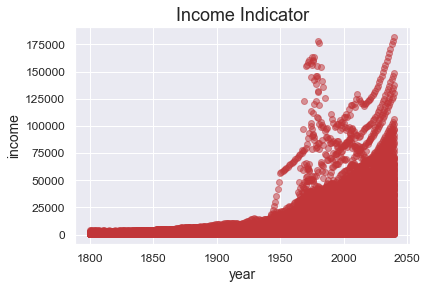

In [89]:
plot_one_scatter(income[['year']], income[['income']], 'Income Indicator')

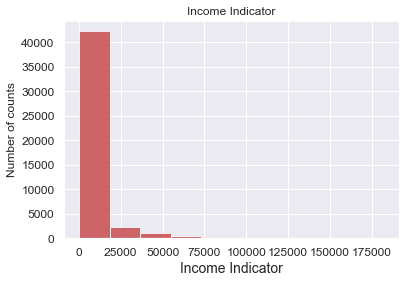

In [90]:
plot_one_histogram(income['income'], 'Income Indicator')

---
I will briefly analise the other indicators, to see how the changed along the years.

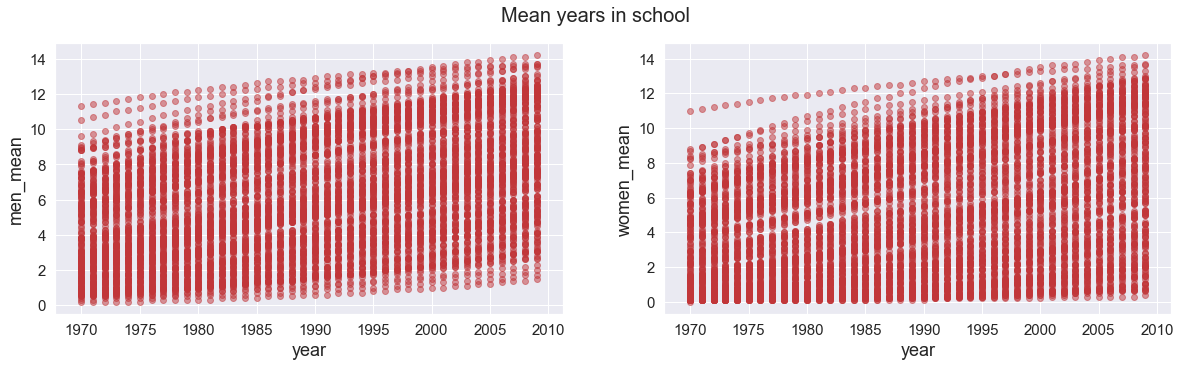

In [91]:
plot_multiple_scatter(mean_years_in_school[['year']], mean_years_in_school[['men_mean', 'women_mean']],
                      'Mean years in school')

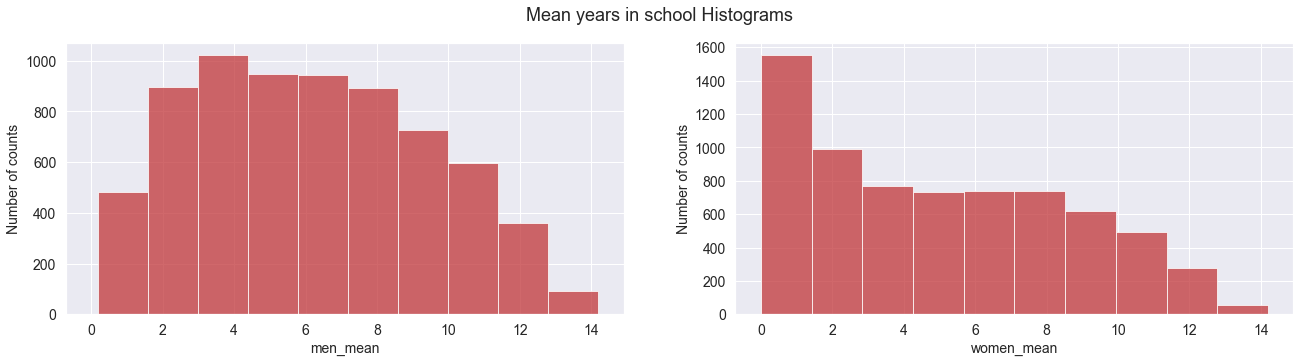

In [92]:
plot_multiple_histogram(mean_years_in_school[['men_mean', 'women_mean']], 'Mean years in school Histograms')

The mean years in school has increased over the years for both genders. There's data available since 1970.

---

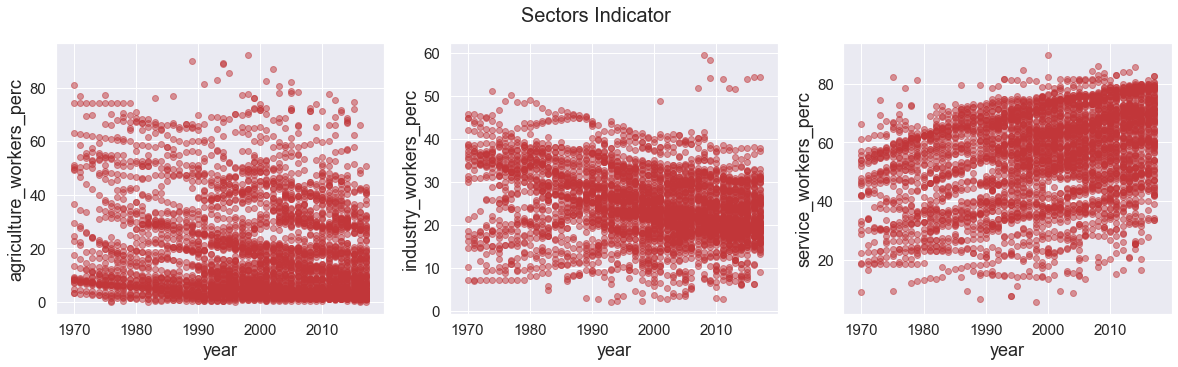

In [93]:
plot_multiple_scatter(sectors[['year']], sectors[['agriculture_workers_perc',
                                                   'industry_workers_perc',
                                                   'service_workers_perc']],
                      'Sectors Indicator')

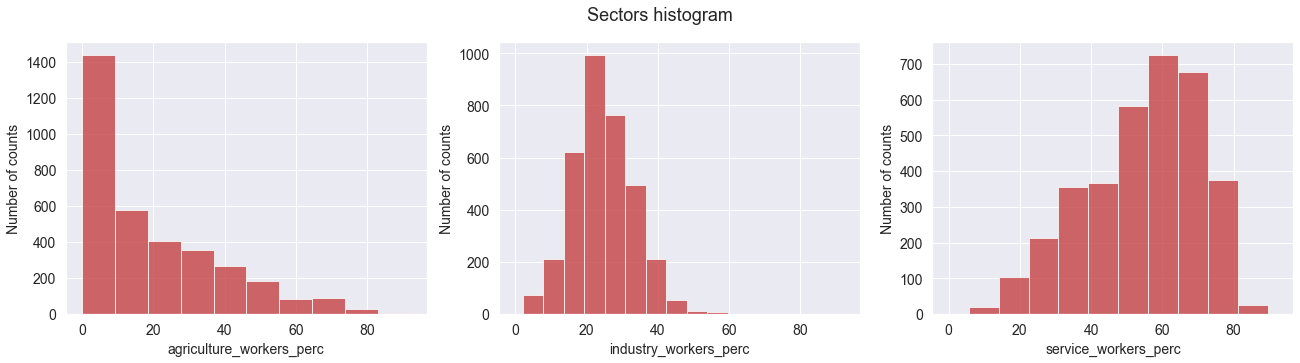

In [94]:
plot_multiple_histogram(sectors[['agriculture_workers_perc', 'industry_workers_perc', 'service_workers_perc']],
                        'Sectors histogram')

As we can see, over the years the agriculture sector was decreasing slowly, and the service sector was increasing, while the industry is almost making like a funnel and concentrating between 15 and 35%. Besides, there's data from 1970 to around 2015.

---

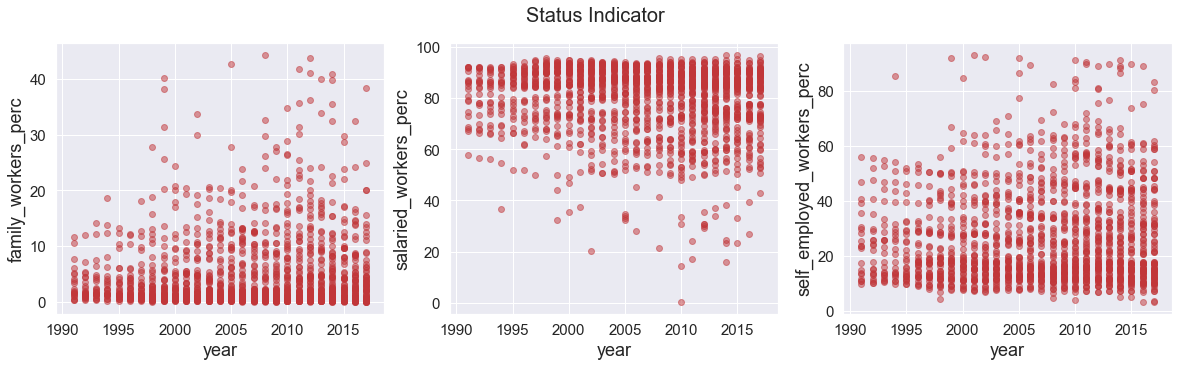

In [95]:
plot_multiple_scatter(status[['year']], status[['family_workers_perc', 'salaried_workers_perc',
                                                'self_employed_workers_perc']],
                      'Status Indicator')

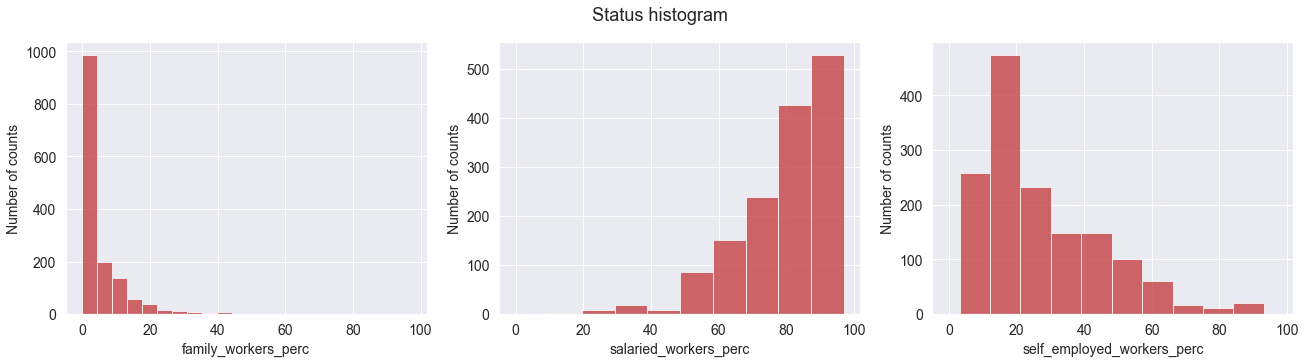

In [96]:
plot_multiple_histogram(status[['family_workers_perc', 'salaried_workers_perc', 'self_employed_workers_perc']],
                        'Status histogram')

The data for `status` indicator is available after 1990. It's possible to see that family workers status has small percentages over the years when compared to salaried workers. Self-employed workers has values concentrated in the middle.

---
<a id='explain_cut_years'></a>
There are many factors that can influence or be related to these indicators. The very change in the agricultural sector may be related to facts such as the natural shift of people to industry or services. Trying to reduce the inherent changes related to the passage of time, I will use for the analysis a smaller number of years.

**Since most indicators have data from 1970 to 2015, I will use the period of a decade from 2000 to 2010.**

In [97]:
# Creating a mask to be used to select the data
years_to_analyse = 'year >= 2000 and year < 2010'

<a id='question_1'></a>
### 1 - Does the mean years spent by the population of a country  in school is related to its income?

I will start getting ten years of data to answer this question.

In [98]:
income_2000_2010 = income.query(years_to_analyse)

In [99]:
income_2000_2010.describe()

,year,income
count,1930.000000,1930.000000
mean,2004.500000,15401.209326
std,2.873026,18950.270584
min,2000.000000,504.000000
25%,2002.000000,2660.000000
50%,2004.500000,8035.000000
75%,2007.000000,20200.000000
max,2009.000000,120000.000000


<a id='mean_2000'></a>
Selecting ten years of data for `mean years in school`.

In [100]:
mean_yrs_2000_2010 = mean_years_in_school.query(years_to_analyse)

In [101]:
mean_yrs_2000_2010.describe()

,year,men_mean,women_mean
count,1740.000000,1740.000000,1740.000000
mean,2004.500000,7.788448,6.773046
std,2.873107,3.161002,3.813390
min,2000.000000,1.000000,0.200000
25%,2002.000000,5.200000,3.300000
50%,2004.500000,7.700000,6.800000
75%,2007.000000,10.700000,10.300000
max,2009.000000,14.200000,14.200000


With the data selected I will join the two indicators, so I can relate them.

In [102]:
mean_yrs_income = mean_yrs_2000_2010.merge(income_2000_2010, on=['country', 'year'], how='inner')

In [103]:
mean_yrs_income.head()

,country,year,men_mean,women_mean,income
0,Afghanistan,2000,2.1,0.2,972
1,Albania,2000,9.1,8.0,5470
2,Algeria,2000,3.7,3.0,10200
3,Angola,2000,4.0,1.9,3510
4,Antigua and Barbuda,2000,11.0,11.2,18800


With the respective income for each value of mean years in school, we can see if there's any relation between the indicators.

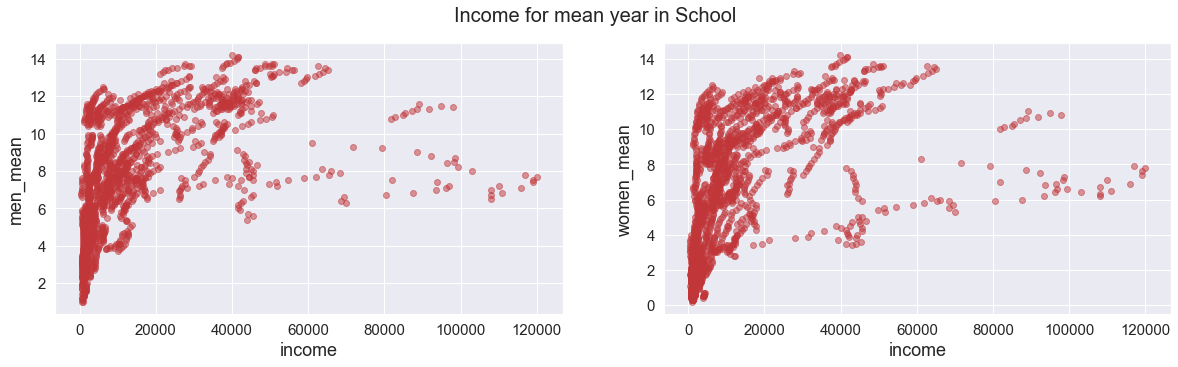

In [104]:
plot_multiple_scatter(mean_yrs_income[['income']], mean_yrs_income[['men_mean', 'women_mean']],
                      'Income for mean year in School')

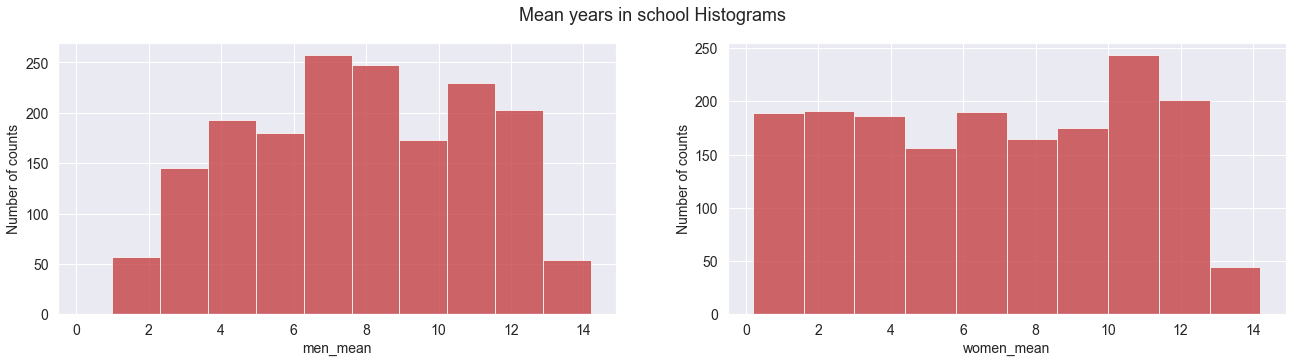

In [105]:
plot_multiple_histogram(mean_yrs_income[['men_mean', 'women_mean']], 'Mean years in school Histograms')

The charts above show us that it's possible to see a relation between the mean years spent in school with the income per person.

---
<a id='ranges'></a>
In order to get a better visualization of a possible relationship between the indicators, I will create four ranges related to the income, which will be:

* **Low**: bellow first quartile
* **Lower Middle**: between first quartile and median
* **Upper Middle**: between median and third quartile
* **High:** above the third quartile

In [106]:
# Create ranges to be used in all questions

min_income = income_2000_2010.income.min()
first_quatile = np.percentile(income_2000_2010.income, 25)
median = np.percentile(income_2000_2010.income, 50)
third_quartile = np.percentile(income_2000_2010.income, 75)
max_income = income_2000_2010.income.max()

bin_edges = [min_income, first_quatile, median, third_quartile, max_income]
bin_names = ['Low', 'Lower Middle', 'Upper Middle', 'High']

Now that I have the bins and edges, I can create the ranges according to the incomes.

In [107]:
mean_yrs_income['income_range'] = pd.cut(mean_yrs_income['income'], bin_edges, labels=bin_names)
mean_yrs_income.head()

,country,year,men_mean,women_mean,income,income_range
0,Afghanistan,2000,2.1,0.2,972,Low
1,Albania,2000,9.1,8.0,5470,Lower Middle
2,Algeria,2000,3.7,3.0,10200,Upper Middle
3,Angola,2000,4.0,1.9,3510,Lower Middle
4,Antigua and Barbuda,2000,11.0,11.2,18800,Upper Middle


In [108]:
mean_income_groups = mean_yrs_income.groupby('income_range', as_index=False).mean()
mean_income_groups

,income_range,year,men_mean,women_mean,income
0,Low,2004.290254,4.689831,2.966949,1573.423729
1,Lower Middle,2004.354312,7.423776,6.312821,5164.475524
2,Upper Middle,2004.605081,8.780600,8.200462,13017.367206
3,High,2004.801980,10.737624,10.197030,41963.366337


In the next step I will plot how the men and women years in school for each income range.

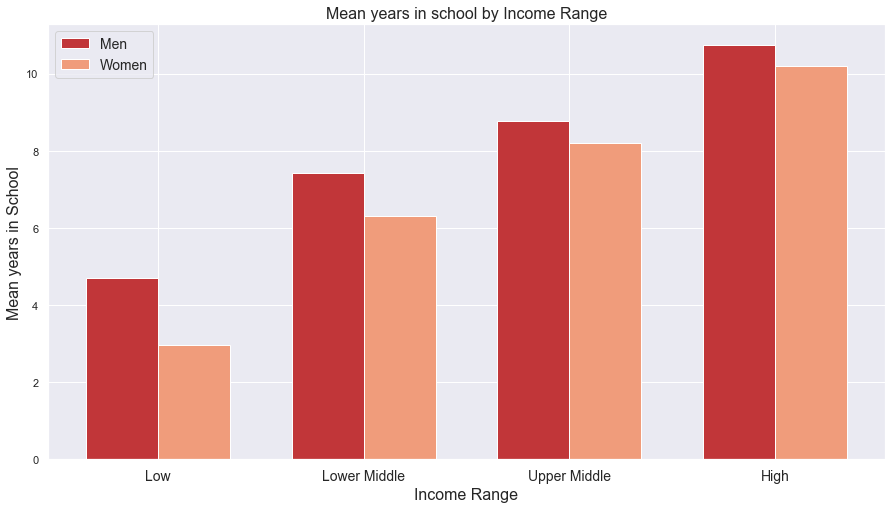

In [109]:
ind = np.arange(mean_income_groups.shape[0])  # the x locations for the groups
width = 0.35       # the width of the bars

plt.figure(figsize=(15,8))

# plot bars
men_means = plt.bar(ind, mean_income_groups['men_mean'], width, label='Men')
women_means = plt.bar(ind + width, mean_income_groups['women_mean'], width, label='Women')

# title and labels
plt.ylabel('Mean years in School', fontsize=16)
plt.xlabel('Income Range', fontsize=16)
plt.title('Mean years in school by Income Range', fontsize=16)
locations = ind + width / 2  # xtick locations
labels = mean_income_groups['income_range']  # xtick labels
plt.xticks(locations, labels, fontsize=14)

# legend
plt.legend(fontsize=14);
create_link('income_years') # this line links a text to this chart

<a id='question_2'></a>
### 2 - How the percentage of workers for employment sector is related to the income in a country?

Following the same [approach](#explain_cut_years) as in question one, I will start selecting the data for ten years.

<a id='sector_2000'></a>
Selecting ten years of data for `employment sectors`.

In [110]:
sectors_2000_2010 = sectors.query(years_to_analyse)

In [111]:
sectors_2000_2010.describe()

,year,agriculture_workers_perc,industry_workers_perc,service_workers_perc
count,980.000000,980.000000,980.000000,980.000000
mean,2004.520408,18.925490,23.292418,57.129776
std,2.829617,18.166592,7.549962,15.106525
min,2000.000000,0.230000,2.750000,8.620000
25%,2002.000000,4.317500,18.900000,48.600000
50%,2005.000000,12.700000,22.500000,59.350000
75%,2007.000000,30.525000,28.300000,68.500000
max,2009.000000,87.100000,59.600000,89.800000


Income is already selected in `income_2000_2010` variable.

In [112]:
income_2000_2010.describe()

,year,income
count,1930.000000,1930.000000
mean,2004.500000,15401.209326
std,2.873026,18950.270584
min,2000.000000,504.000000
25%,2002.000000,2660.000000
50%,2004.500000,8035.000000
75%,2007.000000,20200.000000
max,2009.000000,120000.000000


With the data selected I will join the two indicators, so I can relate them.

In [113]:
sectors_income = sectors_2000_2010.merge(income_2000_2010, on=['country', 'year'], how='inner')

In [114]:
sectors_income.head()

,country,year,agriculture_workers_perc,industry_workers_perc,service_workers_perc,income
0,Albania,2000,71.80,6.65,21.5,5470
1,Argentina,2000,0.67,22.70,76.2,14900
2,Australia,2000,4.86,21.60,73.5,35300
3,Austria,2000,6.05,30.00,63.9,38800
4,Azerbaijan,2000,41.00,10.90,48.1,4460


With the respective income for each sector category, we can see if there's any relation between the indicators.

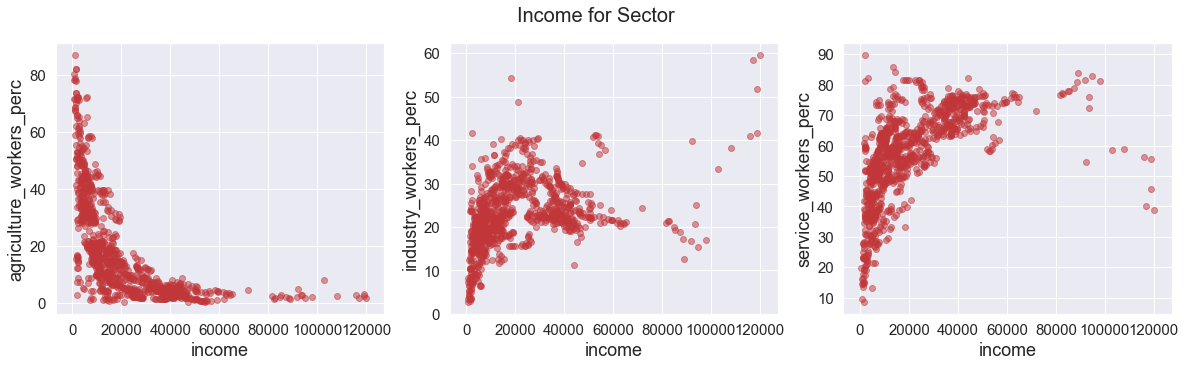

In [115]:
plot_multiple_scatter(sectors_income[['income']], sectors_income[['agriculture_workers_perc',
                                                                        'industry_workers_perc',
                                                                        'service_workers_perc']],
                      'Income for Sector')

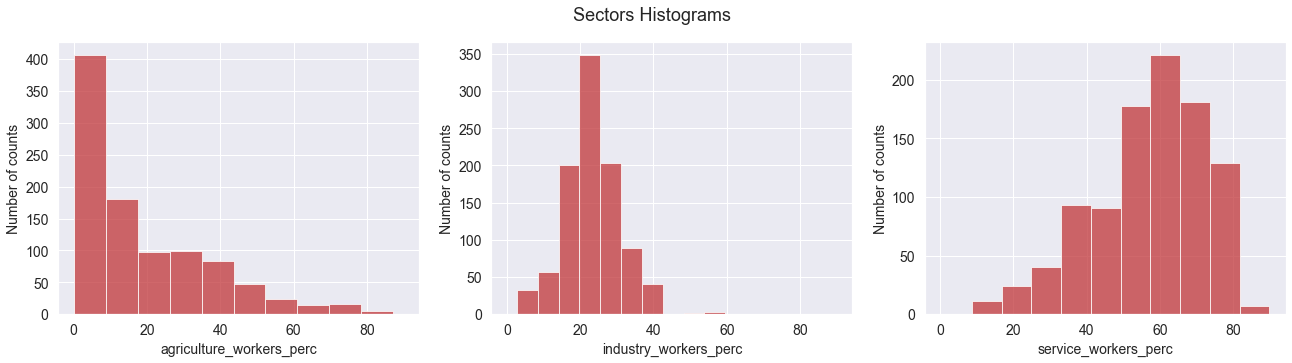

In [116]:
plot_multiple_histogram(sectors_income[['agriculture_workers_perc', 'industry_workers_perc',
                                        'service_workers_perc']],
                        'Sectors Histograms')

The charts above show that there's a relation between the income per person of a country and the percentage of workers in each sector of employment. The agriculture sector has a negative correlation with the income. The service sector has a positive correlation with the income; and the industry sector has a positive correlation too, although it's less than the service sector.

Using the [ranges](#ranges) created previously, I will categorise the sectors_income data.

In [117]:
sectors_income['income_range'] = pd.cut(sectors_income['income'], bin_edges, labels=bin_names)
sectors_income.head()

,country,year,agriculture_workers_perc,industry_workers_perc,service_workers_perc,income,income_range
0,Albania,2000,71.80,6.65,21.5,5470,Lower Middle
1,Argentina,2000,0.67,22.70,76.2,14900,Upper Middle
2,Australia,2000,4.86,21.60,73.5,35300,High
3,Austria,2000,6.05,30.00,63.9,38800,High
4,Azerbaijan,2000,41.00,10.90,48.1,4460,Lower Middle


In [118]:
sectors_income_groups = sectors_income.groupby('income_range', as_index=False).median()
sectors_income_groups

,income_range,year,agriculture_workers_perc,industry_workers_perc,service_workers_perc,income
0,Low,2004,52.90,12.0,31.1,2000
1,Lower Middle,2004,35.40,19.3,43.5,5430
2,Upper Middle,2005,15.70,23.4,58.2,12850
3,High,2005,4.06,24.9,69.6,36900


I used the `median` so the outliers can't influence the percentages as they would if I had used the mean. However, how I'm using an aggregation, if I sum all the sectors it's not going to be exactly a hundred, but will be around it.

In [119]:
(sectors_income_groups['agriculture_workers_perc'] + sectors_income_groups['industry_workers_perc']
                                            + sectors_income_groups['service_workers_perc'])

0    96.00
1    98.20
2    97.30
3    98.56
dtype: float64

In the next step I will plot how the three sectors relate to income range.

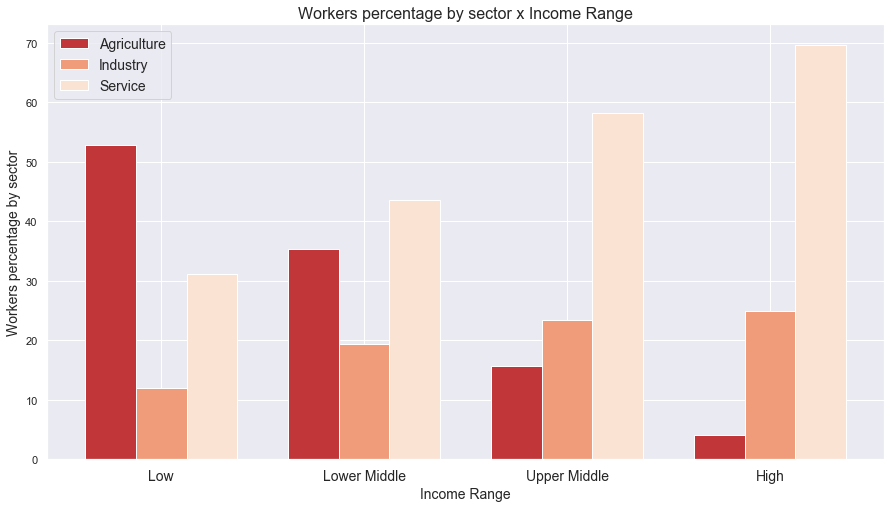

In [120]:
ind = np.arange(sectors_income_groups.shape[0])  # the x locations for the groups
width = 0.25       # the width of the bars

plt.figure(figsize=(15,8))

# plot bars
agriculture = plt.bar(ind, sectors_income_groups['agriculture_workers_perc'], width, label='Agriculture')
industry = plt.bar(ind + width, sectors_income_groups['industry_workers_perc'], width, label='Industry')
service = plt.bar(ind + (width*2), sectors_income_groups['service_workers_perc'], width, label='Service')

# title and labels
plt.ylabel('Workers percentage by sector', fontsize=14)
plt.xlabel('Income Range', fontsize=14)
plt.title('Workers percentage by sector x Income Range', fontsize=16)
locations = ind + (width*2) / 2  # xtick locations
labels = sectors_income_groups['income_range']  # xtick labels
plt.xticks(locations, labels, fontsize=14)

# legend
plt.legend(fontsize=14);
create_link('income_sector') # this line links a text to this chart

The less agriculture the country has, better is the income per person. The sector that is bigger when the income is higher is service. It's possible to see an improvement in industry sector as the income increases, but it is a small change among the income ranges.

---

<a id='question_3'></a>
### 3 - How the percentage of workers for employment status is related to the income in a country?

Following the [approach](#explain_cut_years) of selecting ten years, I will start working on the third questions.

<a id='status_2000'></a>
Selecting ten years of data for `employment status`.

In [121]:
status_2000_2010 = status.query(years_to_analyse)

In [122]:
status_2000_2010.describe()

,year,family_workers_perc,salaried_workers_perc,self_employed_workers_perc
count,576.000000,576.000000,576.000000,576.000000
mean,2004.758681,4.836771,80.320660,26.929566
std,2.869163,6.421774,13.378709,17.140666
min,2000.000000,0.000000,20.300000,4.540000
25%,2002.000000,0.677500,72.375000,13.600000
50%,2005.000000,1.970000,85.450000,20.450000
75%,2007.000000,6.735000,90.200000,36.725000
max,2009.000000,44.300000,95.700000,93.100000


Income is already selected in `income_2000_2010` variable.

In [123]:
income_2000_2010.describe()

,year,income
count,1930.000000,1930.000000
mean,2004.500000,15401.209326
std,2.873026,18950.270584
min,2000.000000,504.000000
25%,2002.000000,2660.000000
50%,2004.500000,8035.000000
75%,2007.000000,20200.000000
max,2009.000000,120000.000000


With the data selected I will join the two indicators, so I can relate them.

In [124]:
status_income = status_2000_2010.merge(income_2000_2010, on=['country', 'year'], how='inner')

In [125]:
status_income.head()

,country,year,family_workers_perc,salaried_workers_perc,self_employed_workers_perc,income
0,Argentina,2000,1.15,72.4,27.6,14900
1,Austria,2000,2.73,91.1,13.5,38800
2,Belgium,2000,2.09,85.1,16.1,37300
3,Bolivia,2000,24.40,46.8,38.0,4410
4,Botswana,2000,17.10,81.6,34.2,10400


With the respective income for each status category, we can see if there's any relation between the indicators.

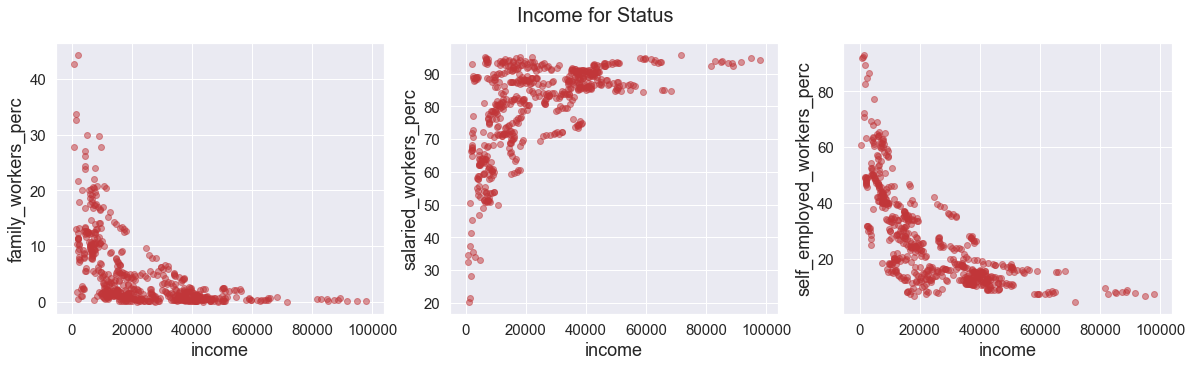

In [126]:
plot_multiple_scatter(status_income[['income']], status_income[['family_workers_perc', 'salaried_workers_perc',
                                                                'self_employed_workers_perc']],
                      'Income for Status')

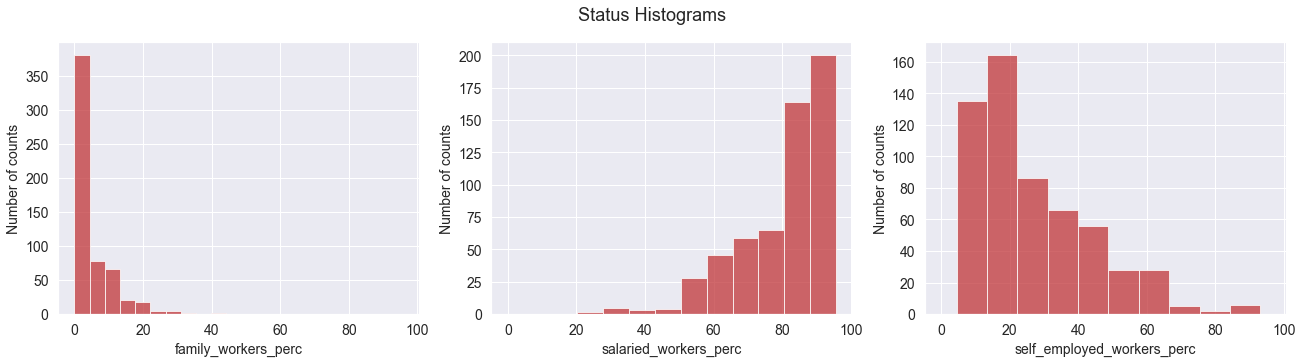

In [127]:
plot_multiple_histogram(status_income[['family_workers_perc', 'salaried_workers_perc',
                                       'self_employed_workers_perc']],
                        'Status Histograms')

It's possible to see in the graphs above show that there's a relation between the income per person of a country and the percentage of workers in each status of employment.

The family status has a negative correlation with the income, and the self-employed status has a negative correlation too. On the other hand, the salaried status has a positive correlation with the income.

Using the [ranges](#ranges) created previously, I will categorise the status_income data.

In [128]:
status_income['income_range'] = pd.cut(status_income['income'], bin_edges, labels=bin_names)
status_income.head()

,country,year,family_workers_perc,salaried_workers_perc,self_employed_workers_perc,income,income_range
0,Argentina,2000,1.15,72.4,27.6,14900,Upper Middle
1,Austria,2000,2.73,91.1,13.5,38800,High
2,Belgium,2000,2.09,85.1,16.1,37300,High
3,Bolivia,2000,24.40,46.8,38.0,4410,Lower Middle
4,Botswana,2000,17.10,81.6,34.2,10400,Upper Middle


In [129]:
status_income_groups = status_income.groupby('income_range', as_index=False).median()
status_income_groups

,income_range,year,family_workers_perc,salaried_workers_perc,self_employed_workers_perc,income
0,Low,2005,11.35,66.55,49.1,2025
1,Lower Middle,2005,10.80,63.30,49.5,6120
2,Upper Middle,2005,2.94,80.60,28.2,14300
3,High,2005,0.81,87.90,14.6,37400


As shown above, the data for each status is skewed, so I used the `median`, because it shows better the central number for each category. The status data is not as consistent when adding the proportions of the three sectors as the sectors data, so we can see that using `sum()` the values are above 100. However, it still can give an idea of the relation between status and income in the countries. Just to make it clear, even if adding the raw data for each year it's possible to see values different of 100%, the data provided is not as consistent as it could be.
<a id='adding_status'></a>

In [130]:
# this code shows how many rows we have that are higher than 100
sum((status_income['family_workers_perc'] + status_income['salaried_workers_perc']
                                            + status_income['self_employed_workers_perc']) > 100)

550

In [131]:
(status_income_groups['family_workers_perc'] + status_income_groups['salaried_workers_perc']
                                            + status_income_groups['self_employed_workers_perc'])

0    127.00
1    123.60
2    111.74
3    103.31
dtype: float64

In the next step I will plot how the three sectors relate to income range.

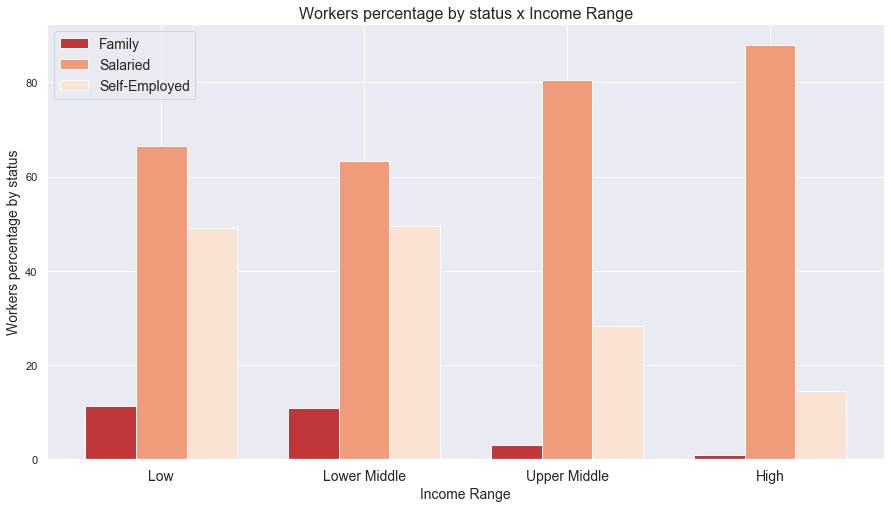

In [132]:
ind = np.arange(status_income_groups.shape[0])  # the x locations for the groups
width = 0.25       # the width of the bars

plt.figure(figsize=(15,8))

# plot bars
family = plt.bar(ind, status_income_groups['family_workers_perc'], width, label='Family')
salaried = plt.bar(ind + width, status_income_groups['salaried_workers_perc'], width, label='Salaried')
self_employed = plt.bar(ind + (width*2), status_income_groups['self_employed_workers_perc'], width,
                        label='Self-Employed')

# title and labels
plt.ylabel('Workers percentage by status', fontsize=14)
plt.xlabel('Income Range', fontsize=14)
plt.title('Workers percentage by status x Income Range', fontsize=16)
locations = ind + (width*2) / 2  # xtick locations
labels = status_income_groups['income_range']  # xtick labels
plt.xticks(locations, labels, fontsize=14)

# legend
plt.legend(fontsize=14);
create_link('income_status') # this line links a text to this chart

A better income is related with a low percentage of self-employed and family workers. `Family` category is so low (0.735) in countries with a high income range that it's almost not even appearing on the chart. The more salaried workers a country has, the better is its income per person.

---

Now that I analysed the three independent variables with the dependent one, I will check for relations among the independent variables as well.

<a id='question_4'></a>
### 4 - Is there a correlation between mean years in school and the employment sector proportions?

Countries with a greater mean years in school indicator have which employment sector proportions?
To answer it, I will use the [mean_yrs_2000_2010](#mean_2000) and [sectors_2000_2010](#sector_2000) variables used before to see if there's a correlation.

In [133]:
mean_yrs_2000_2010.head()

,country,year,men_mean,women_mean
5220,Afghanistan,2000,2.1,0.2
5221,Albania,2000,9.1,8.0
5222,Algeria,2000,3.7,3.0
5223,Angola,2000,4.0,1.9
5224,Antigua and Barbuda,2000,11.0,11.2


In [134]:
sectors_2000_2010.head()

,country,year,agriculture_workers_perc,industry_workers_perc,service_workers_perc
5281,Albania,2000,71.80,6.65,21.5
5285,Argentina,2000,0.67,22.70,76.2
5287,Australia,2000,4.86,21.60,73.5
5288,Austria,2000,6.05,30.00,63.9
5289,Azerbaijan,2000,41.00,10.90,48.1


In [135]:
mean_sectors = mean_yrs_2000_2010.merge(sectors_2000_2010, on=['country', 'year'], how='inner')

In [136]:
mean_sectors.head()

,country,year,men_mean,women_mean,agriculture_workers_perc,industry_workers_perc,service_workers_perc
0,Albania,2000,9.1,8.0,71.80,6.65,21.5
1,Argentina,2000,8.9,9.1,0.67,22.70,76.2
2,Australia,2000,11.3,10.9,4.86,21.60,73.5
3,Austria,2000,11.3,10.2,6.05,30.00,63.9
4,Azerbaijan,2000,11.1,9.9,41.00,10.90,48.1


<a id='mean_men_women'></a>
The data for mean years is split by gender, in order to procede with the analysis I will calculate the mean for the country. I will use a simple arithmetic mean to simplify, however, it would be more appropriate to use a weighted mean using the population of men and women.

In [137]:
# Calculating the mean
mean_sectors['mean'] = mean_sectors[['men_mean', 'women_mean']].mean(axis=1)

I'm going to use a bar chart to show the proportions for each bin of years in school. So, firstly I will define the bins, and then plot the charts.

In [138]:
mean_sectors.describe()

,year,men_mean,women_mean,agriculture_workers_perc,industry_workers_perc,service_workers_perc,mean
count,932.000000,932.000000,932.000000,932.000000,932.000000,932.000000,932.000000
mean,2004.522532,9.404828,8.790021,19.541835,23.118627,56.718004,9.097425
std,2.822825,2.595569,3.087249,18.151051,7.398631,15.170741,2.815164
min,2000.000000,1.500000,0.300000,0.670000,2.750000,8.620000,1.100000
25%,2002.000000,7.500000,6.500000,4.617500,18.800000,48.200000,6.950000
50%,2005.000000,9.700000,9.400000,13.550000,22.500000,58.550000,9.500000
75%,2007.000000,11.600000,11.300000,31.200000,27.800000,68.200000,11.450000
max,2009.000000,14.200000,14.200000,87.100000,59.600000,89.800000,14.200000


<a id='bins_years'></a>
Below, I will define the bins for mean years in school.

In [139]:
bin_edges_years = [0, 2, 4, 6, 8, 10, 12, 14.2]
bin_names_years = ['0-2', '2-4', '4-6', '6-8', '8-10', '10-12','12-14']

In [140]:
mean_sectors['mean_bins'] = pd.cut(mean_sectors['mean'], bin_edges_years, labels=bin_names_years)
mean_sectors.head()

,country,year,men_mean,women_mean,agriculture_workers_perc,industry_workers_perc,service_workers_perc,mean,mean_bins
0,Albania,2000,9.1,8.0,71.80,6.65,21.5,8.55,8-10
1,Argentina,2000,8.9,9.1,0.67,22.70,76.2,9.00,8-10
2,Australia,2000,11.3,10.9,4.86,21.60,73.5,11.10,10-12
3,Austria,2000,11.3,10.2,6.05,30.00,63.9,10.75,10-12
4,Azerbaijan,2000,11.1,9.9,41.00,10.90,48.1,10.50,10-12


In [141]:
mean_sector_groups = mean_sectors.groupby('mean_bins', as_index=False).median()
mean_sector_groups

,mean_bins,year,men_mean,women_mean,agriculture_workers_perc,industry_workers_perc,service_workers_perc,mean
0,0-2,2004,2.55,0.75,66.65,6.935,27.80,1.525
1,2-4,2003,4.40,2.30,43.40,20.000,36.10,3.400
2,4-6,2003,5.90,4.60,30.30,20.000,45.10,5.350
3,6-8,2005,7.50,6.50,17.40,22.500,54.95,6.900
4,8-10,2005,9.10,8.90,15.20,21.900,62.50,9.000
5,10-12,2004,11.40,11.10,7.06,24.900,63.15,11.250
6,12-14,2006,12.70,12.50,3.58,23.100,73.00,12.550


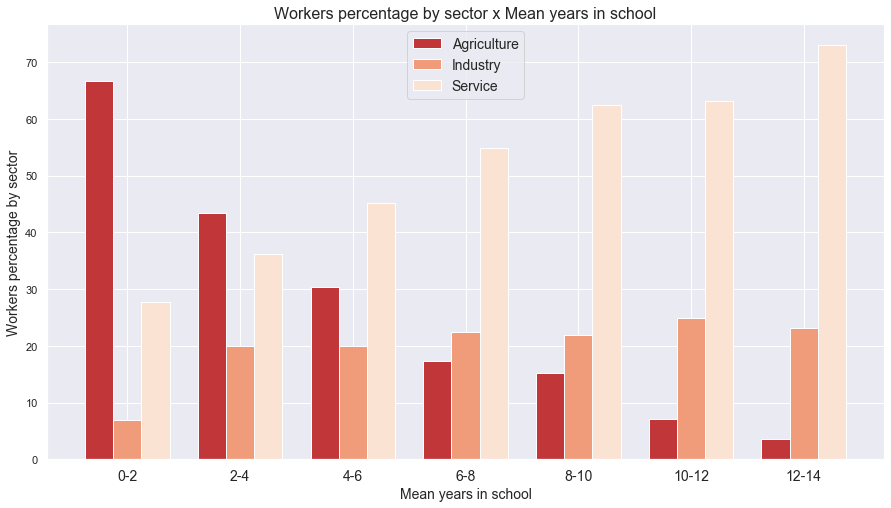

In [142]:
ind = np.arange(mean_sector_groups.shape[0])  # the x locations for the groups
width = 0.25       # the width of the bars

plt.figure(figsize=(15,8))

# plot bars
agriculture = plt.bar(ind, mean_sector_groups['agriculture_workers_perc'], width, label='Agriculture')
industry = plt.bar(ind + width, mean_sector_groups['industry_workers_perc'], width, label='Industry')
service = plt.bar(ind + (width*2), mean_sector_groups['service_workers_perc'], width, label='Service')

# title and labels
plt.ylabel('Workers percentage by sector', fontsize=14)
plt.xlabel('Mean years in school', fontsize=14)
plt.title('Workers percentage by sector x Mean years in school', fontsize=16)
locations = ind + (width*2) / 2  # xtick locations
labels = mean_sector_groups['mean_bins']  # xtick labels
plt.xticks(locations, labels, fontsize=14)

# legend
plt.legend(fontsize=14);
create_link('sector_years') # this line links a text to this chart

As shown above, the `employment by sector` seems to relate to the `mean years in school`. While the agriculture sector decreases with the increase of years studied, the service sector shows a different trend. The higher the education the bigger is the portion occupied by service sector in a country. The industry sector is pretty much the same for every bucket of years studied.

<a id='question_5'></a>
### 5 - Is there a correlation between mean years in school and the employment status proportions?

Countries with a greater mean years in school indicator have which employment status proportions?
To answer it, I will use the [mean_yrs_2000_2010](#mean_2000) and [status_2000_2010](#status_2000) variables used before to see if there's a correlation.

In [143]:
mean_yrs_2000_2010.head()

,country,year,men_mean,women_mean
5220,Afghanistan,2000,2.1,0.2
5221,Albania,2000,9.1,8.0
5222,Algeria,2000,3.7,3.0
5223,Angola,2000,4.0,1.9
5224,Antigua and Barbuda,2000,11.0,11.2


In [144]:
status_2000_2010.head()

,country,year,family_workers_perc,salaried_workers_perc,self_employed_workers_perc
5135,Argentina,2000,1.15,72.4,27.6
5138,Austria,2000,2.73,91.1,13.5
5145,Belgium,2000,2.09,85.1,16.1
5149,Bolivia,2000,24.40,46.8,38.0
5151,Botswana,2000,17.10,81.6,34.2


In [145]:
mean_status = mean_yrs_2000_2010.merge(status_2000_2010, on=['country', 'year'], how='inner')

In [146]:
mean_status.head()

,country,year,men_mean,women_mean,family_workers_perc,salaried_workers_perc,self_employed_workers_perc
0,Argentina,2000,8.9,9.1,1.15,72.4,27.6
1,Austria,2000,11.3,10.2,2.73,91.1,13.5
2,Belgium,2000,11.3,10.9,2.09,85.1,16.1
3,Bolivia,2000,7.3,5.3,24.40,46.8,38.0
4,Botswana,2000,4.1,4.4,17.10,81.6,34.2


Just as I treated the data in the [previous question](#mean_men_women), I will do it again calculating the mean between men and women.

In [147]:
# Calculating the mean
mean_status['mean'] = mean_status[['men_mean', 'women_mean']].mean(axis=1)

I will use the same bins for `mean years in school` that I created [before](#bins_years), and then will apply it to the status data.

In [148]:
mean_status['mean_bins'] = pd.cut(mean_status['mean'], bin_edges_years, labels=bin_names_years)
mean_status.head()

,country,year,men_mean,women_mean,family_workers_perc,salaried_workers_perc,self_employed_workers_perc,mean,mean_bins
0,Argentina,2000,8.9,9.1,1.15,72.4,27.6,9.00,8-10
1,Austria,2000,11.3,10.2,2.73,91.1,13.5,10.75,10-12
2,Belgium,2000,11.3,10.9,2.09,85.1,16.1,11.10,10-12
3,Bolivia,2000,7.3,5.3,24.40,46.8,38.0,6.30,6-8
4,Botswana,2000,4.1,4.4,17.10,81.6,34.2,4.25,4-6


In [149]:
mean_status_groups = mean_status.groupby('mean_bins', as_index=False).median()
mean_status_groups

,mean_bins,year,men_mean,women_mean,family_workers_perc,salaried_workers_perc,self_employed_workers_perc,mean
0,0-2,2005,2.5,0.70,33.700,21.40,92.10,1.450
1,2-4,2004,4.5,2.30,18.000,54.30,63.30,3.600
2,4-6,2004,6.4,4.75,9.850,61.90,48.20,5.650
3,6-8,2005,7.6,6.60,6.530,78.40,36.70,7.000
4,8-10,2005,9.1,9.00,3.695,71.70,33.30,8.925
5,10-12,2004,11.3,11.00,1.285,89.25,15.30,11.200
6,12-14,2006,12.8,12.60,0.405,88.20,12.75,12.750


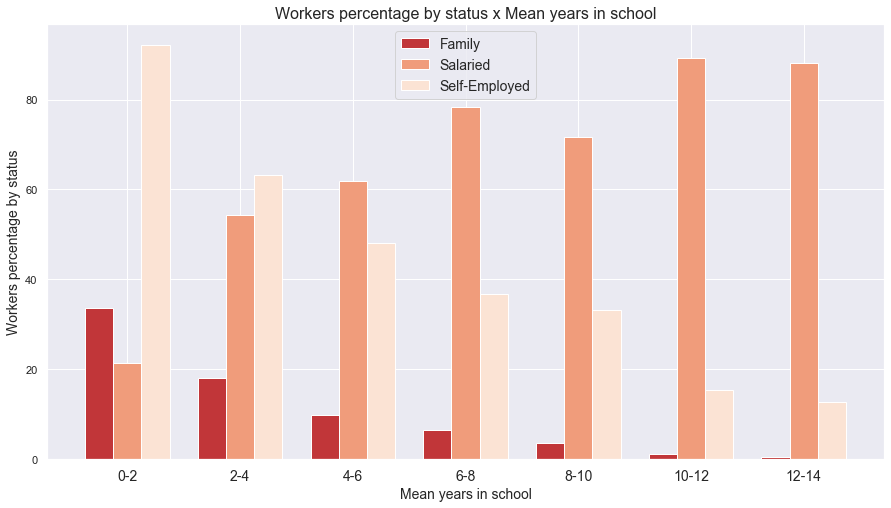

In [150]:
ind = np.arange(mean_status_groups.shape[0])  # the x locations for the groups
width = 0.25       # the width of the bars

plt.figure(figsize=(15,8))

# plot bars
family = plt.bar(ind, mean_status_groups['family_workers_perc'], width, label='Family')
salaried = plt.bar(ind + width, mean_status_groups['salaried_workers_perc'], width, label='Salaried')
self_employed = plt.bar(ind + (width*2), mean_status_groups['self_employed_workers_perc'], width,
                        label='Self-Employed')

# title and labels
plt.ylabel('Workers percentage by status', fontsize=14)
plt.xlabel('Mean years in school', fontsize=14)
plt.title('Workers percentage by status x Mean years in school', fontsize=16)
locations = ind + (width*2) / 2  # xtick locations
labels = mean_status_groups['mean_bins']  # xtick labels
plt.xticks(locations, labels, fontsize=14)

# legend
plt.legend(fontsize=14);
create_link('status_years') # this line links a text to this chart

The chart illustrates that the `employment by status` relates to the `mean years in school`. A higher proportion of salaried workers occurs in countries with a higher mean of years in school. On the other hand, the family and self-employed workers percentages decrease when the country has a better mean of years studied.

---
<a id='question_6'></a>
### 6 - Is there a correlation between the employment sector and the employment status?

Do the employment sector relates to the employment status of a country?
To answer it, I will use the [sectors_2000_2010](#sector_2000) and [status_2000_2010](#status_2000) variables used before to see if there's a correlation.

In [151]:
sectors_2000_2010.head(2)

,country,year,agriculture_workers_perc,industry_workers_perc,service_workers_perc
5281,Albania,2000,71.80,6.65,21.5
5285,Argentina,2000,0.67,22.70,76.2


In [152]:
status_2000_2010.head(2)

,country,year,family_workers_perc,salaried_workers_perc,self_employed_workers_perc
5135,Argentina,2000,1.15,72.4,27.6
5138,Austria,2000,2.73,91.1,13.5


In [153]:
sector_and_status = sectors_2000_2010.merge(status_2000_2010, on=['country', 'year'], how='inner')

In [154]:
sector_and_status.head()

,country,year,agriculture_workers_perc,industry_workers_perc,service_workers_perc,family_workers_perc,salaried_workers_perc,self_employed_workers_perc
0,Argentina,2000,0.67,22.7,76.2,1.15,72.4,27.6
1,Austria,2000,6.05,30.0,63.9,2.73,91.1,13.5
2,Belgium,2000,1.91,25.8,72.3,2.09,85.1,16.1
3,Bolivia,2000,38.90,18.6,42.4,24.40,46.8,38.0
4,Botswana,2000,19.70,20.9,58.2,17.10,81.6,34.2


I'm going to use the `plot_multiple_scatter` function that I wrote on [visuals](#visuals) to plot the relation between the variables.

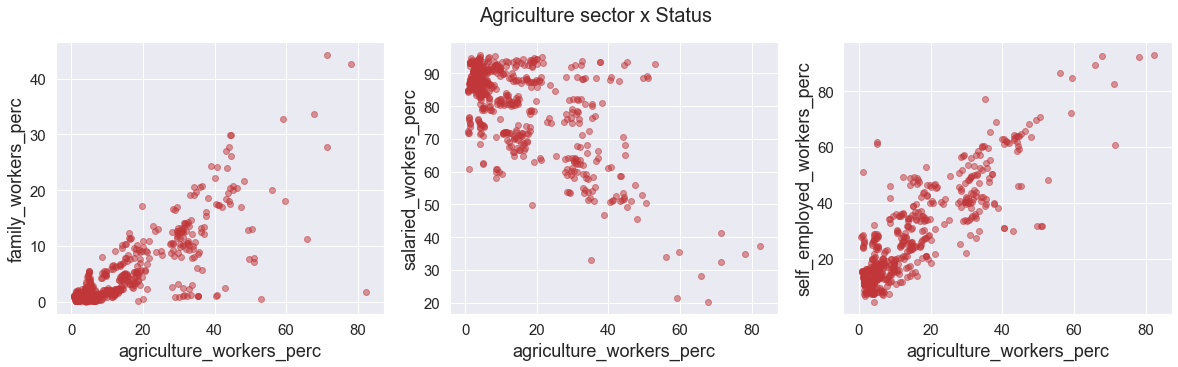

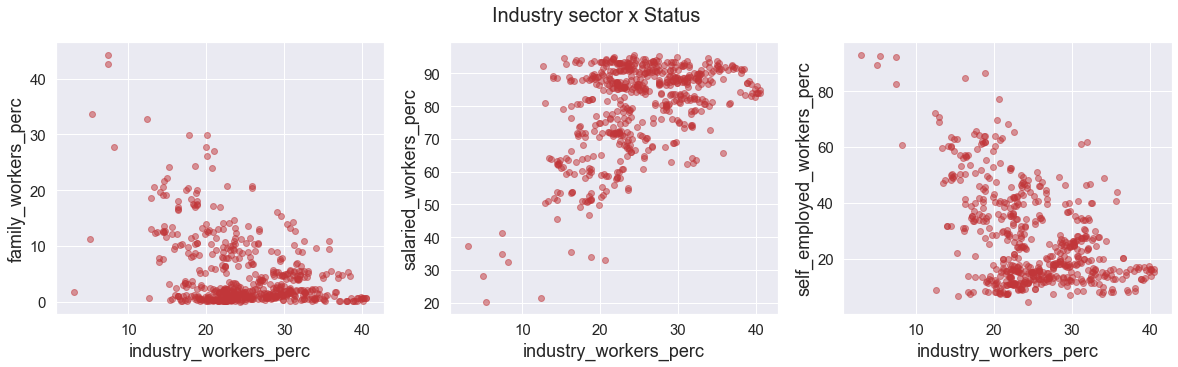

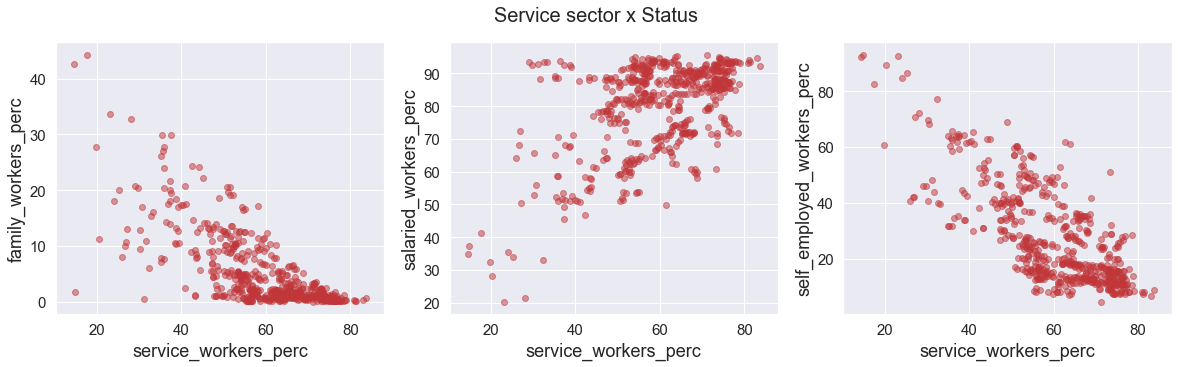

In [155]:
plot_multiple_scatter(sector_and_status[['agriculture_workers_perc']],
                      sector_and_status[['family_workers_perc',
                                         'salaried_workers_perc', 'self_employed_workers_perc']],
                      'Agriculture sector x Status')

plot_multiple_scatter(sector_and_status[['industry_workers_perc']],
                      sector_and_status[['family_workers_perc',
                                         'salaried_workers_perc', 'self_employed_workers_perc']],
                      'Industry sector x Status')

plot_multiple_scatter(sector_and_status[['service_workers_perc']],
                      sector_and_status[['family_workers_perc',
                                         'salaried_workers_perc', 'self_employed_workers_perc']],
                      'Service sector x Status')

create_link('sector_status') # this line links a text to this chart

Based on the plots, it's possible to say that:

Agriculture and Status:
- Family workers and self employed workers have a positive relation with agriculture.
- Countries with high percentage of salaried workers have less agriculture workers.

Industry and Status:
- Family workers and self employed workers have a slight negative relation with agriculture.
- Countries with high percentage of salaried workers have more industry workers.

Service and Status:
- Family workers and self employed workers have a strong negative relation with agriculture.
- Countries with high percentage of salaried workers have strong relation with service workers.

<a id='conclusions'></a>
## Conclusions


<a id='limitations'></a>
### Limitations of the analysis

All these limitations have been discussed through the analysis, but I will state them here to keep it clear.

- The sector and status indicators had many Null values, and both variables are composed of three categories. Some rows had 2 values making possible to calculate the third one. As, even dropping the Null data points there'we enough data for the analysis, I proceeded with the approach of dropping them.

- There is a change in the indicators inherent to time, for example, along the years the agriculture sector is decreasing since people are shifting to other sectors. So, to reduce the noise caused by time, I chose to use only ten years, from 2000 to 2010.

- In order to make the analysis simpler, I calculated the arithmetic mean between men and women mean years in school to answers the questions 4 and 5. However, it would be more appropriated to use a weighted arithmetic mean considering the men and women population for each country.

- This analysis aims to look for correlation among the indicators. All the conclusions are made based on the data visualization that is presented.

<a id='results'></a>
### Results

The analysis showed that the three main indicators are related to the income of a country.

[1. *Does the mean years spent by the population of a country  in school is related to its income?*](#question_1)

Higher income ranges are present in countries with greater means of years in school, the graph [*"Mean years in school by income range"*](#income_years) shows that the countries with the lowest income range have men studying around four years and women studying around two years. While for the highest income range, both of the genders have around 11 years of study.

[2. *How the percentage of workers per employment sector is related to the income in a country?*](#question_2)

The proportions of employees in each sector is different for every income range. The chart [*Workers percentage by sector*](#income_sector) illustrates that countries with a lower income range have more workers in the Agriculture sector. The percentages for a low income country are around: 55% - Agriculture; 12% - Industry; 33% - Service. As the income range grows, the distribution changes, increasing the Industry and Service sectors and reducing the Agriculture one. A country with a high income range has around: 5% - Agriculture; 25% - Industry; 70% - Service.

[3. *How the percentage of workers per employment status is related to the income in a country?*](#question_3)
The chart [*Workers percentage by status*](#income_status) shows that the status least present is family, and as the income range raises it becomes even smaller. Self employed proportion decreases as the income rows, but the salaried status is higher in bigger income ranges, having an opposite trend to the self employed status. It's possible to see that the sum of the status is different of 100%, but it's just a reflex of the raw data. When adding the three status for each year it already has data hogher than 100, as you can see [here](#adding_status).

[4. *Is there a correlation between the mean years in school and the employment sector proportions?*](#question_4)
The two independent variables, sectors and mean years in school, show a relation in chart [*Workers percentage by sector x Mean years in school*](#sector_years). Countries with higher mean years in school present more service workers and less agriculture ones. Industry grows slow as the mean years studied increases, but it's very similar among the years range. For countries with a study mean between 0 and 2 the proportions are around: 65% - Agriculture; 25% - Services and 10% - Industry. It changes a lot if compared to places with mean between 12 and 14, which show a distribution like: 5% - Agriculture; 75% - Service and 20% - Industry.

[5. *Is there a correlation between the mean years in school and the employment status proportions?*](#question_5)
As shown in chart [*Workers percentage by status x Mean years in school*](#status_years), the mean years studied by a countries population also has a relation with the status employement proportions of a nation. In countries with a smaller mean of years in school there are more workers in family and self employed status. However, as the ranges for studied mean years increases the proportion changes, and salaried status become the most predominant status.

[6. *Is there a correlation between the employment sector and the employment status?*](#question_6)
The scatter plots of [*Sectors x Status*](#sector_status) highlight clear relations among the categories.<br>Countries with higher Agriculture sector have more family and self employed workers and less salaried workers.<br>Countries with higher Insustry sector have more salaried workers and less family and self employed people.<br>Countries with higher Service sector also have more salaried employees and less family and self employed workers.

In conclusion, the three indicators are related to the income of a country. Also, the indicators among themselves can be related. Countries with a smaller income show lower means of years in school, more agriculture sector and more family and self employed workers. Nations with a bigger income demonstrate higher means of years in shool, more service sector and more salaried workers. Further analysis could try to see if there's more than a correlation, but a causation among the variables, so we could try to find a key to increase the income per person of a country.